In [2]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO

(-0.5, 337.5, 478.5, -0.5)

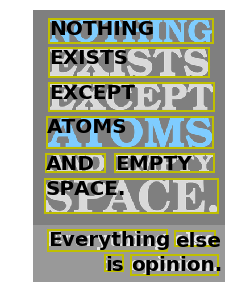

In [3]:
_region = 'westcentralus' #Here you enter the region of your subscription
_url = 'https://{}.api.cognitive.microsoft.com/vision/v2.0/ocr'.format(_region)
_key = '9438c593902948179871edf1cf0033c6' #Here you have to paste your primary key
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
params  = {}
json=None
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/" + \
    "Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png"
data    = {'url': image_url}
response = requests.request('post', _url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

# Extract the word bounding boxes and text.
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(5, 5))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch  = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
plt.axis("off")

In [4]:
analysis

{'language': 'en',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '21,16,304,451',
   'lines': [{'boundingBox': '28,16,288,41',
     'words': [{'boundingBox': '28,16,288,41', 'text': 'NOTHING'}]},
    {'boundingBox': '27,66,283,52',
     'words': [{'boundingBox': '27,66,283,52', 'text': 'EXISTS'}]},
    {'boundingBox': '27,128,292,49',
     'words': [{'boundingBox': '27,128,292,49', 'text': 'EXCEPT'}]},
    {'boundingBox': '24,188,292,54',
     'words': [{'boundingBox': '24,188,292,54', 'text': 'ATOMS'}]},
    {'boundingBox': '22,253,297,32',
     'words': [{'boundingBox': '22,253,105,32', 'text': 'AND'},
      {'boundingBox': '144,253,175,32', 'text': 'EMPTY'}]},
    {'boundingBox': '21,298,304,60',
     'words': [{'boundingBox': '21,298,304,60', 'text': 'SPACE.'}]},
    {'boundingBox': '26,387,294,37',
     'words': [{'boundingBox': '26,387,210,37', 'text': 'Everything'},
      {'boundingBox': '249,389,71,27', 'text': 'else'}]},
    {'boundingBox': '127,431,198